# Dataset used: World Development Indicators

## Dataset Exploratory Data Analysis  

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Week5-Visualization/world-development-indicators/Indicators.csv.zip')
data.shape

(5656458, 6)

In [3]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


### Unique Countries

In [4]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Unique Indicators

In [5]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### How many years of data do we have ?

In [6]:
years = data['Year'].unique().tolist()
len(years)

56

### Range of timeseries data

In [7]:
print(min(years)," to ",max(years))

1960  to  2015


## Exploring Indicators 

In [8]:
indicators

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

In [9]:
list(filter(lambda x: x.lower().find('gdp per capita') > -1, indicators))

['GDP per capita (current US$)',
 'GDP per capita (constant 2005 US$)',
 'GDP per capita (current LCU)',
 'GDP per capita (constant LCU)',
 'GDP per capita growth (annual %)',
 'Government expenditure per secondary student as % of GDP per capita (%)',
 'Government expenditure per primary student as % of GDP per capita (%)',
 'Government expenditure per tertiary student as % of GDP per capita (%)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)']

In [10]:
list(filter(lambda x: x.lower().find('life expectancy') > -1, indicators))

['Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)']

In [169]:
gdp_indicator = "GDP per capita (current US$)"
life_expectancy_indicator = "Life expectancy at birth, total (years)"

### Filter Data for GDP and Life Expectancy Indicators

In [73]:
filter_data = data.query(f' IndicatorName == "{gdp_indicator}" | IndicatorName == "{life_expectancy_indigator}" ')
filter_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,46.847059
95,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,457.464712
103,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.271795
188,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,67.823762
264,East Asia & Pacific (all income levels),EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,146.814138


In [77]:
filter_data.groupby(["CountryName", "Year"]).groups

{('Afghanistan', 1960): Int64Index([3525, 3550], dtype='int64'),
 ('Afghanistan', 1961): Int64Index([27265, 27289], dtype='int64'),
 ('Afghanistan', 1962): Int64Index([54117, 54141], dtype='int64'),
 ('Afghanistan', 1963): Int64Index([82521, 82545], dtype='int64'),
 ('Afghanistan', 1964): Int64Index([111195, 111219], dtype='int64'),
 ('Afghanistan', 1965): Int64Index([140629, 140655], dtype='int64'),
 ('Afghanistan', 1966): Int64Index([172527, 172551], dtype='int64'),
 ('Afghanistan', 1967): Int64Index([204066, 204090], dtype='int64'),
 ('Afghanistan', 1968): Int64Index([236803, 236827], dtype='int64'),
 ('Afghanistan', 1969): Int64Index([269463, 269487], dtype='int64'),
 ('Afghanistan', 1970): Int64Index([307033, 307083], dtype='int64'),
 ('Afghanistan', 1971): Int64Index([370005, 370048], dtype='int64'),
 ('Afghanistan', 1972): Int64Index([438509, 438555], dtype='int64'),
 ('Afghanistan', 1973): Int64Index([508393, 508439], dtype='int64'),
 ('Afghanistan', 1974): Int64Index([577921, 

### Data cleaning
Extracting countries with both the indicators present

In [81]:
clean_filter_data = filter_data.groupby(["CountryName", "Year"]).filter(lambda x: len(x) > 1)
clean_filter_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
95,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,457.464712
103,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.271795
264,East Asia & Pacific (all income levels),EAS,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,146.814138
282,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,48.298317
377,East Asia & Pacific (developing only),EAP,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,89.319639


In [194]:
df = clean_filter_data.pivot_table(index=[clean_filter_data.Year, clean_filter_data.CountryName], values='Value', columns='IndicatorName', aggfunc='first')
# same results can be achieved by following as well:
# clean_filter_data.groupby(["Year", "CountryName", "IndicatorName"]) ["Value"].first().unstack()

In [196]:
df = df.reset_index(level=['CountryName', 'Year'])
df.head()

IndicatorName,Year,CountryName,GDP per capita (current US$),"Life expectancy at birth, total (years)"
0,1960,Afghanistan,59.787681,32.328512
1,1960,Algeria,244.823735,46.135122
2,1960,Australia,1806.804876,70.817073
3,1960,Austria,935.460427,68.585610
4,1960,"Bahamas, The",1550.337434,62.729049


## Initial Correlation Analysis
- Life expectancy at birth, total (years) and GDP per capita (current USD) are **Moderately Correlated**
- Year and GDP per capita (current USD) / Life expectancy at birth, total (years) are **Weakly Correlated**

In [142]:
df.corr()

IndicatorName,Year,GDP per capita (current US$),"Life expectancy at birth, total (years)"
IndicatorName,,,
Year,1.000000,0.342872,0.420501
GDP per capita (current US$),0.342872,1.000000,0.524861
"Life expectancy at birth, total (years)",0.420501,0.524861,1.000000


# Gross Domestic Product (per capita) trend over time for the countries present in dataset?

## Average GDP (per capita) trend over time

### GDP (per capita) grows exponentially over time

In [252]:
mean_indicator_df = df.groupby(["Year"]).mean().reset_index(level=['Year'])

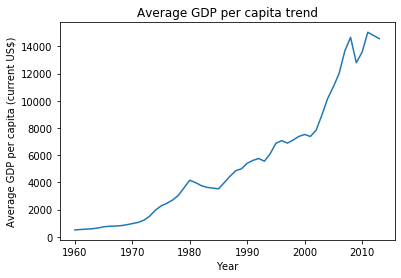

In [265]:
plt.plot(mean_indicator_df.Year, mean_indicator_df["GDP per capita (current US$)"])

plt.title("Average GDP per capita trend")
plt.xlabel("Year")
plt.ylabel("Average GDP per capita (current US$)")

plt.savefig("Average_GDP_per_capita_trend")

plt.show()

## Example countries - GDP (per capita) trend over time

In [217]:
us = df[df["CountryName"] == "United States"]
china = df[df["CountryName"] == "China"]
thailand = df[df["CountryName"] == "Thailand"]
india = df[df["CountryName"] == "India"]

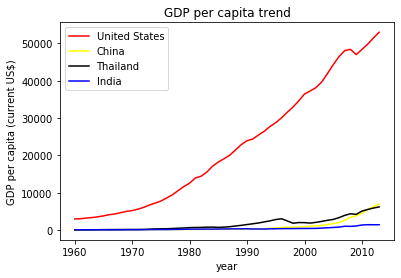

In [266]:
plt.plot(us.Year, us["GDP per capita (current US$)"], color = "red")
plt.plot(china.Year, china["GDP per capita (current US$)"], color = "yellow")
plt.plot(thailand.Year, thailand["GDP per capita (current US$)"], color = "black")
plt.plot(india.Year, india["GDP per capita (current US$)"], color = "blue")

plt.title("GDP per capita trend")
plt.legend(["United States", "China", "Thailand", "India"])
plt.xlabel("year")
plt.ylabel("GDP per capita (current US$)")

plt.savefig("GDP_per_capita_trend")

plt.show()

## GDP (per capita) *Growth* trend over time

In [231]:
us_growth = (us["GDP per capita (current US$)"] / us["GDP per capita (current US$)"].iloc[0]) * 100
china_growth = (china["GDP per capita (current US$)"] / china["GDP per capita (current US$)"].iloc[0]) * 100
thailand_growth = (thailand["GDP per capita (current US$)"] / thailand["GDP per capita (current US$)"].iloc[0]) * 100
india_growth = (india["GDP per capita (current US$)"] / india["GDP per capita (current US$)"].iloc[0]) * 100

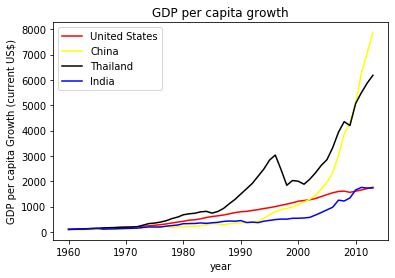

In [267]:
plt.plot(us.Year, us_growth, color = "red")
plt.plot(china.Year, china_growth, color = "yellow")
plt.plot(thailand.Year, thailand_growth, color = "black")
plt.plot(india.Year, india_growth, color = "blue")

plt.title("GDP per capita growth")
plt.legend(["United States", "China", "Thailand", "India"])
plt.xlabel("year")
plt.ylabel("GDP per capita Growth (current US$)")

plt.savefig("GDP_per_capita_growth")
plt.show()

# Life Expectancy trend over time for the countries present in dataset?

## Average life expectancy trend over time

### Life Expectancy grows linearly over time for most of the countries

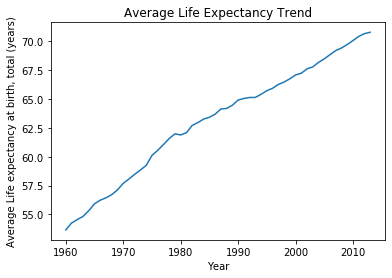

In [268]:
plt.plot(mean_indicator_df.Year, mean_indicator_df["Life expectancy at birth, total (years)"])

plt.title("Average Life Expectancy Trend")
plt.xlabel("Year")
plt.ylabel("Average Life expectancy at birth, total (years)")

plt.savefig("Average_Life_Expectancy_Trend")
plt.show()

## Example countries - life expectancy trend over time

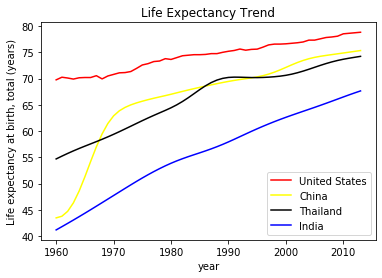

In [269]:
plt.plot(us.Year, us["Life expectancy at birth, total (years)"], color = "red")
plt.plot(china.Year, china["Life expectancy at birth, total (years)"], color = "yellow")
plt.plot(thailand.Year, thailand["Life expectancy at birth, total (years)"], color = "black")
plt.plot(india.Year, india["Life expectancy at birth, total (years)"], color = "blue")

plt.title("Life Expectancy Trend")
plt.legend(["United States", "China", "Thailand", "India"])
plt.xlabel("year")
plt.ylabel("Life expectancy at birth, total (years)")

plt.savefig("Life_Expectancy_Trend")
plt.show()

# How Gross Domestic Product impact the Life Expectancy of the country residents?

In [233]:
data_2007 = df[df.Year == 2007]
data_2007.head()

IndicatorName,Year,CountryName,GDP per capita (current US$),"Life expectancy at birth, total (years)"
8211,2007,Afghanistan,380.400955,57.833829
8212,2007,Albania,3603.013685,76.464854
8213,2007,Algeria,3939.559939,72.898366
8214,2007,Angola,3402.145980,49.435732
8215,2007,Antigua and Barbuda,15276.068265,74.803220


### We see that Life Expectancy is growing exponentially with the increase of GDP per capita of a country.

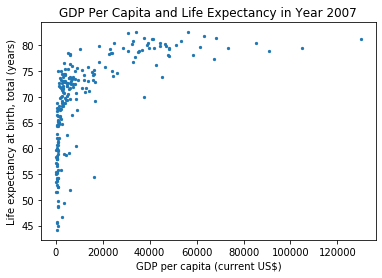

In [272]:
plt.scatter(data_2007["GDP per capita (current US$)"], data_2007["Life expectancy at birth, total (years)"], 5)

plt.title("GDP Per Capita and Life Expectancy in Year 2007")
plt.xlabel("GDP per capita (current US$)")
plt.ylabel("Life expectancy at birth, total (years)")

plt.savefig("GDP_and_Life_Expectancy")
plt.show()

## Applying logarithmic scale to GDP Per Capita

### We see that Life Expectancy displays linear growth rate (rate of change) with the increase of GDP per capita of a country.

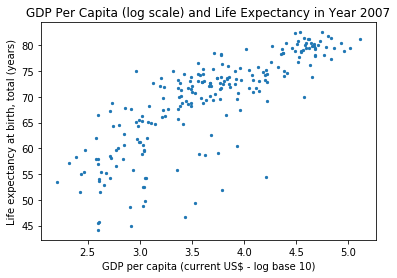

In [273]:
plt.scatter(np.log10(data_2007["GDP per capita (current US$)"]), data_2007["Life expectancy at birth, total (years)"], 5)

plt.title("GDP Per Capita (log scale) and Life Expectancy in Year 2007")
plt.xlabel("GDP per capita (current US$ - log base 10)")
plt.ylabel("Life expectancy at birth, total (years)")

plt.savefig("Log_GDP_and_Life_Expectancy")
plt.show()

# Correlation Analysis

In [274]:
df["Log GDP per capita (current US$)"] = np.log(df["GDP per capita (current US$)"])

In [275]:
df.corr()

IndicatorName,Year,GDP per capita (current US$),"Life expectancy at birth, total (years)",Log GDP per capita (current US$)
IndicatorName,,,,
Year,1.000000,0.342872,0.420501,0.481307
GDP per capita (current US$),0.342872,1.000000,0.524861,0.730561
"Life expectancy at birth, total (years)",0.420501,0.524861,1.000000,0.837068
Log GDP per capita (current US$),0.481307,0.730561,0.837068,1.000000


In [276]:
df["GDP per capita (current US$)"].corr(df["Life expectancy at birth, total (years)"])

0.5248609291114417

In [157]:
df["Log GDP per capita (current US$)"].corr(df["Life expectancy at birth, total (years)"])

0.8370675637393181

### Life expectancy and GDP per capita are Moderately Correlated. With Pearson Coefficient of 0.52
### Life expectancy (log scale) and GDP per capita are Strongly Correlated. With Pearson Coefficient of 0.84


## Henceforth citizens of rich countries have higher life expectancy.
